In [31]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [32]:
## load the data
eqdf = pd.read_csv('all_month.csv')

In [33]:
## inspect the variable counts and types
eqdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

In [34]:
## summarise basic statistics information of the variable values
eqdf.describe()

## interestingly, the negative magnitude of earthquake exists in the dataset

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9409.000000,6823.000000,6822.000000,5053.000000,9410.000000,6347.000000,9410.000000,6745.000000,6810.000000
mean,40.694347,-117.863831,25.593011,1.645013,23.403635,119.461838,0.747333,0.294069,1.698991,2.083547,0.276723,15.534655
std,20.430642,66.380624,54.697555,1.230108,22.145048,62.376305,2.697378,0.276421,3.095408,15.786392,0.477658,23.290696
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,9.000000,70.000000,0.014850,0.090000,0.260000,0.420000,0.110000,5.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,31.000000,157.000000,0.196200,0.470000,0.860000,1.400000,0.248000,18.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


In [35]:
## count missing values for each variable
eqdf.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

In [36]:
## check first 5 rows of observations
eqdf = pd.read_csv("all_month.csv")
eqdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


In [37]:
## check last 5 rows of observations
eqdf.tail()

## we can tell that the all_month dataset covers a period from 2022-12-23T02:26:53.351Z to 2023-01-22T02:21:07.540Z

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9405,2022-12-23T02:44:45.937Z,63.282800,-150.606500,127.7,2.00,ml,NaN,NaN,NaN,0.3900,...,2023-01-07T03:06:05.369Z,"62 km ESE of Denali National Park, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
9406,2022-12-23T02:42:28.843Z,38.180500,-117.813900,7.9,1.40,ml,16.0,133.87,0.122000,0.1421,...,2022-12-23T17:26:10.304Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.60,0.30,4.0,reviewed,nn,nn
9407,2022-12-23T02:41:04.040Z,38.829666,-122.791664,1.5,1.13,md,24.0,45.00,0.008791,0.0300,...,2022-12-23T03:09:14.609Z,"6km W of Cobb, CA",earthquake,0.19,0.35,0.13,24.0,automatic,nc,nc
9408,2022-12-23T02:30:14.282Z,63.368900,-153.228800,7.1,1.60,ml,NaN,NaN,NaN,0.7400,...,2023-01-14T00:17:55.844Z,"70 km NE of Nikolai, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak
9409,2022-12-23T02:26:53.351Z,58.393000,-154.591000,6.3,2.00,ml,NaN,NaN,NaN,0.4600,...,2023-01-14T00:17:55.638Z,"92 km N of Karluk, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak


Text(0.5, 0, 'Magnitude scale')

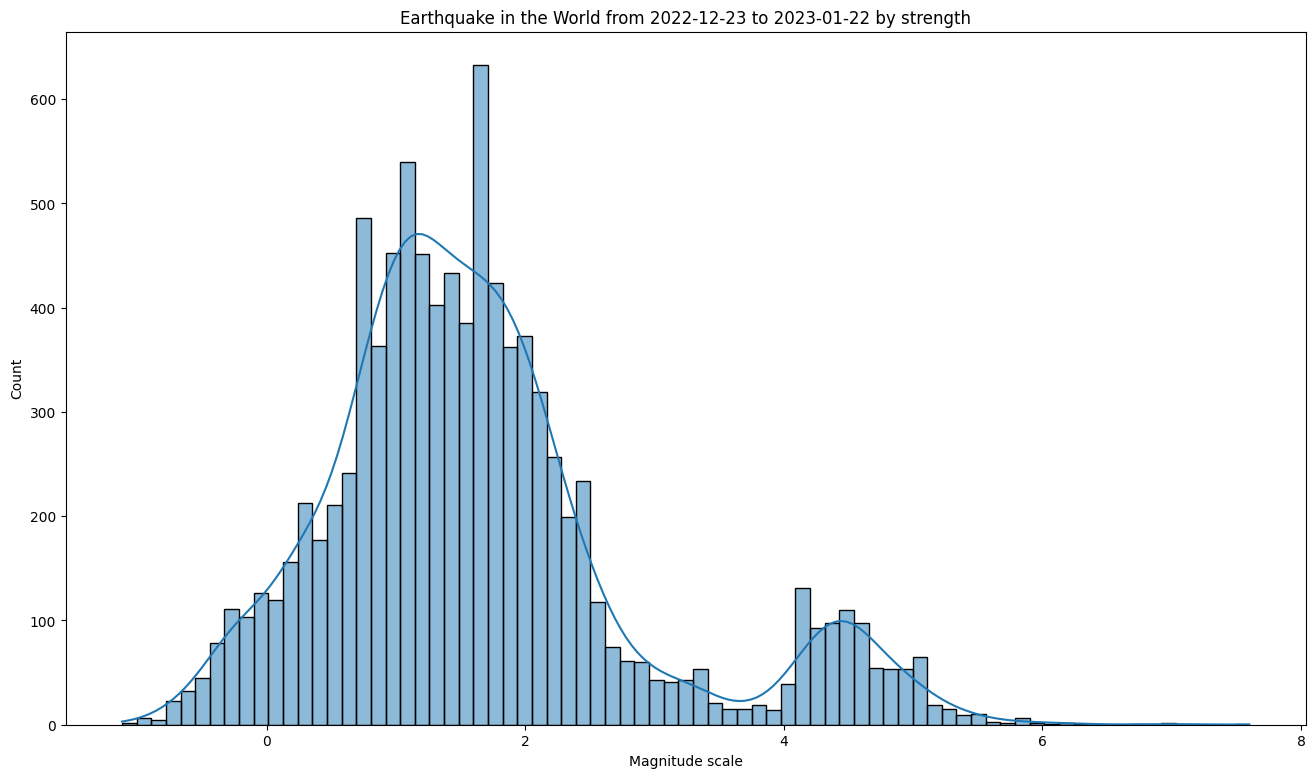

In [50]:
## distribution of magnitude of earthquakes
plt.subplots(figsize=(16,9))
sns.histplot(data=eqdf, x=eqdf["mag"],kde=True).set( title="Earthquake in the World from 2022-12-23 to 2023-01-22 by strength")
plt.xlabel("Magnitude scale")

mag is a measurement of earthquake strength, while depth means the depth of earthquake origin below the ground by kilometers. I decided to create a scatterplot showing the earthquake strength against its depth to investigate whether there is certain effect of earthquake depth on earthquake strength given other external elements held the same. To achievel the goal, I set x-axis and y-axis of the scatterplot to be depth and mag respectively, while adding an identity line to better observe the scatterplot results. Generally speaking, it is observed that most of the earth in the month with depth below 300 kilometers possess strengths higher than the one indicated by identity line, while the earthquakes deeper than 300 kilometers are significantly weaker than the identity line predicts. Despite the absence of time element and other major explanatory factors, we may suggest a possible negative correlation between earthquake strength and depth in the month from 23rd December 2022 to 22nd Janu

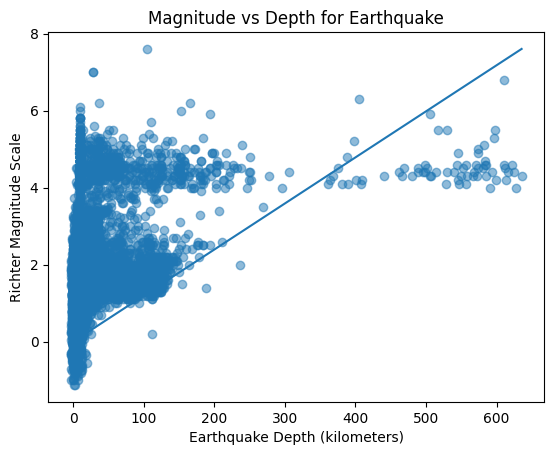

In [38]:
## scatterplot with an identity line
y = pd.DataFrame(eqdf.loc[:,"mag"])
x = pd.DataFrame(eqdf.loc[:,"depth"])

fig = plt.scatter(x,y,alpha=0.5)

plt.title("Magnitude vs Depth for Earthquake")
plt.ylabel("Richter Magnitude Scale")
plt.xlabel("Earthquake Depth (kilometers)")
ymax = max(eqdf['mag'])
xmax = max(eqdf['depth'])
plt.plot([0,xmax],[0,ymax])

print("mag is a measurement of earthquake strength, while depth means the depth of earthquake origin below the ground by kilometers. I decided to create a scatterplot showing the earthquake strength against its depth to investigate whether there is certain effect of earthquake depth on earthquake strength given other external elements held the same. To achievel the goal, I set x-axis and y-axis of the scatterplot to be depth and mag respectively, while adding an identity line to better observe the scatterplot results. Generally speaking, it is observed that most of the earth in the month with depth below 300 kilometers possess strengths higher than the one indicated by identity line, while the earthquakes deeper than 300 kilometers are significantly weaker than the identity line predicts. Despite the absence of time element and other major explanatory factors, we may suggest a possible negative correlation between earthquake strength and depth in the month from 23rd December 2022 to 22nd January 2023 in a totally cross-sectional perspective.")

In [39]:
# correlation table
corr_mat = eqdf.corr()
corr_mat

C:\Users\mmm\AppData\Local\Temp\ipykernel_14428\211968728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = eqdf.corr()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,-0.526669,-0.189100,-0.560208,-0.319926,0.096873,-0.491256,0.068500,-0.556798,-0.042429,-0.087019,-0.174522
longitude,-0.526669,1.000000,0.165518,0.614498,0.343884,-0.088584,0.347246,0.224413,0.646467,0.048314,-0.190499,0.299331
depth,-0.189100,0.165518,1.000000,0.402345,0.256209,-0.045315,0.183884,0.324206,0.546472,0.044364,-0.006246,0.242382
mag,-0.560208,0.614498,0.402345,1.000000,0.555888,-0.052772,0.482166,0.519412,0.753955,0.060874,-0.007488,0.424224
nst,-0.319926,0.343884,0.256209,0.555888,1.000000,-0.387363,0.210236,0.441565,0.333363,0.007432,0.048564,0.579107
gap,0.096873,-0.088584,-0.045315,-0.052772,-0.387363,1.000000,-0.012030,-0.032345,0.044677,0.180673,0.086295,-0.240312
dmin,-0.491256,0.347246,0.183884,0.482166,0.210236,-0.012030,1.000000,0.420352,0.594327,0.080354,-0.106477,0.197771
rms,0.068500,0.224413,0.324206,0.519412,0.441565,-0.032345,0.420352,1.000000,0.784418,0.033526,-0.096560,0.378163
horizontalError,-0.556798,0.646467,0.546472,0.753955,0.333363,0.044677,0.594327,0.784418,1.000000,0.357436,-0.112268,0.314376
depthError,-0.042429,0.048314,0.044364,0.060874,0.007432,0.180673,0.080354,0.033526,0.357436,1.000000,-0.064545,0.058462


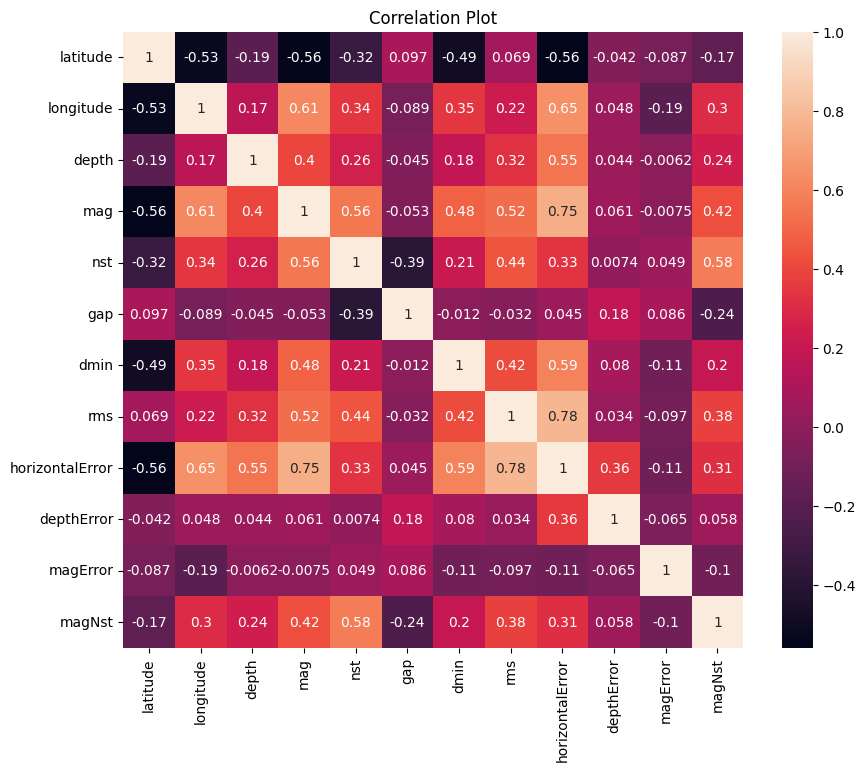

correlation coefficient between depth and magnitude is 0.4 which is against the common theory of negative relationship betwee these two variables. Despite testing for statistical significance, it is worth for further discussion.
correlation coefficient between latitude and longitude is -0.53, suggesting more common earthquakes in distribution on north-west and south-east spheres during the period.
correlations for mag vs latitude and mag vs longitude are -0.56 and 0.61 respectively, suggesting stronger earthquakes usually happen on south-east sphere durng the period.
correlations for depth vs latitude and depth vs longitude are -0.19 and 0.17 respectively, suggesting deeper earthquakes usually happen on south-east sphere, but to a smaller extend than magnitude distribution or closer to equator durng the period.


In [40]:
## correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Plot')
plt.show()

print("correlation coefficient between depth and magnitude is 0.4 which is against the common theory of negative relationship betwee these two variables. Despite testing for statistical significance, it is worth for further discussion.")
print("correlation coefficient between latitude and longitude is -0.53, suggesting more common earthquakes in distribution on north-west and south-east spheres during the period.")
print("correlations for mag vs latitude and mag vs longitude are -0.56 and 0.61 respectively, suggesting stronger earthquakes usually happen on south-east sphere durng the period.")
print("correlations for depth vs latitude and depth vs longitude are -0.19 and 0.17 respectively, suggesting deeper earthquakes usually happen on south-east sphere, but to a smaller extend than magnitude distribution or closer to equator durng the period.")

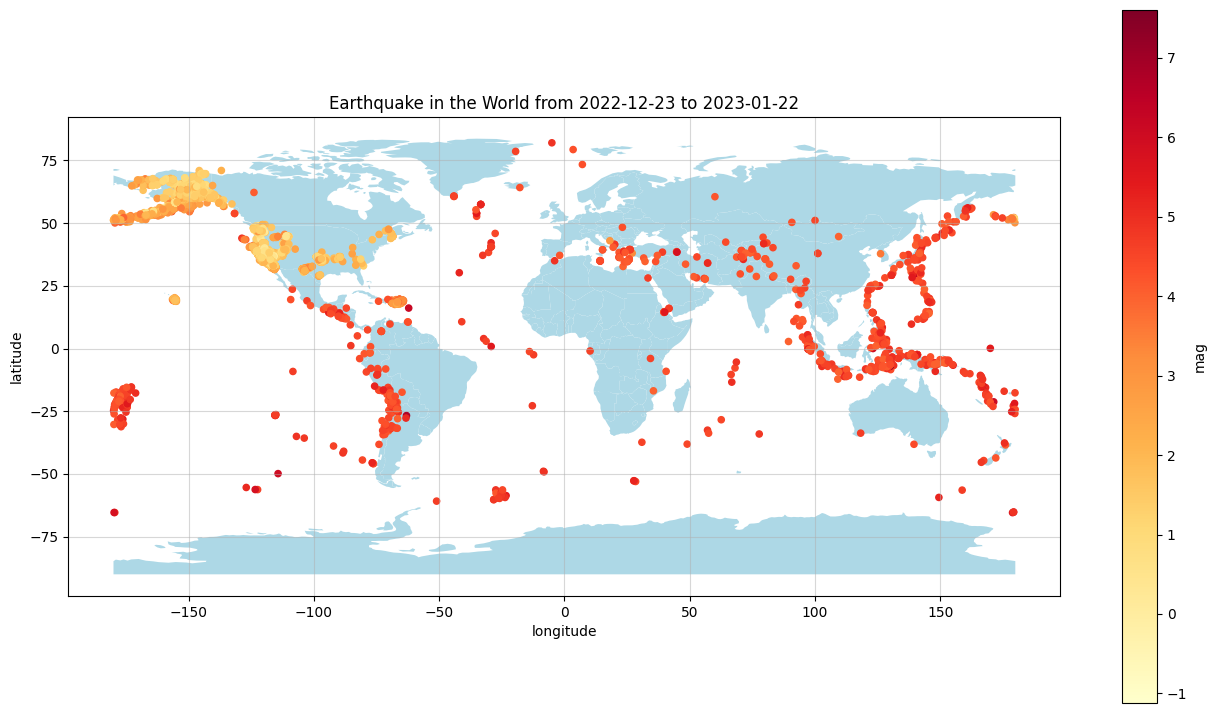

lots clearly illustrated the earthquake belts in North and South America, East and South-East Asia and also in Pacific and Atlantic, strengths indicated by colours.


In [41]:
## scatterplot working on earthquake distribution
## initialise an axis
fig, ax=plt.subplots(figsize=(16,9))

## plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightblue",

ax=ax)

## plot latitude and longtitude
eqdf.plot(x="longitude", y="latitude", kind="scatter", c="mag",colormap="YlOrRd", title=f"Earthquake in the World from 2022-12-23 to 2023-01-22",
          ax=ax)

## add a grid
ax.grid(visible=True, alpha=0.5)
plt.show()

print("lots clearly illustrated the earthquake belts in North and South America, East and South-East Asia and also in Pacific and Atlantic, strengths indicated by colours.")

In [42]:
## Extract dates to use from time varaible 
eqdf['time'] = pd.to_datetime(eqdf['time']).dt.date
eqdf['time'].head()
eqdf['time'] = eqdf['time'].astype('datetime64')

[Text(0.5, 1.0, 'Earthquake in the World from 2022-12-23 to 2023-01-22 by date')]

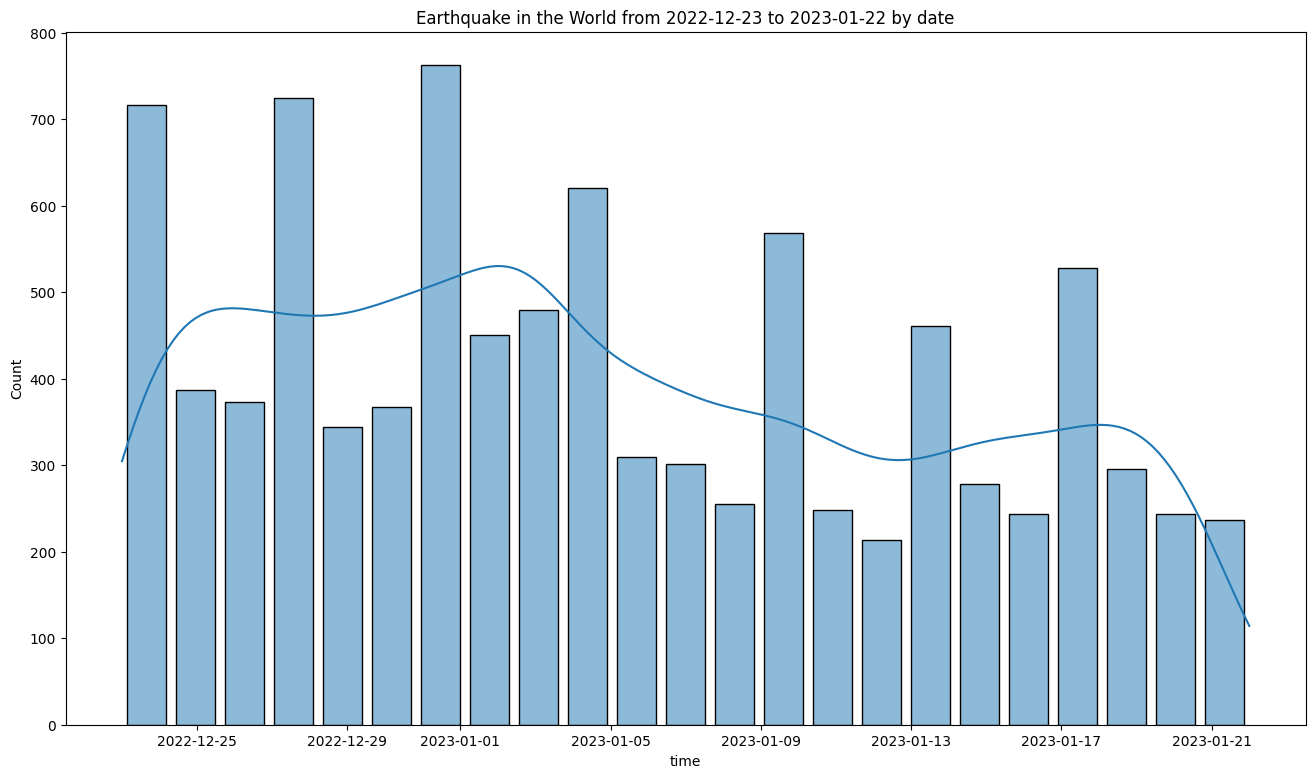

In [44]:
## frequency table of earthquakes distributed over days in a month 
plt.subplots(figsize=(16,9))
sns.histplot(data=eqdf, x=eqdf["time"], shrink=.8,kde=True).set( title="Earthquake in the World from 2022-12-23 to 2023-01-22 by date")